In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random as rd

In [4]:
# Import the data
data_frame = pd.read_csv('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/MachineLearning/Lab/Lab9/OldFaithfulData.csv')

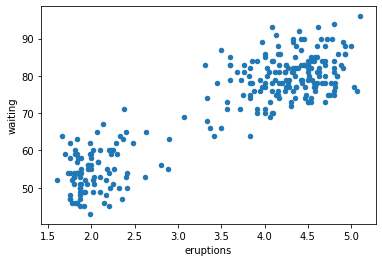

In [5]:
data_frame.plot.scatter(x ='eruptions', y= 'waiting' )

In [6]:
from mlxtend.preprocessing import standardize
std_df = standardize(data_frame, columns=['eruptions', 'waiting'])
std_df

,eruptions,waiting
0,0.098499,0.597123
1,-1.481459,-1.245181
2,-0.135861,0.228663
3,-1.057503,-0.655644
4,0.917443,1.039277
...,...,...
267,0.552298,0.744508
268,-1.174245,-1.834719
269,0.815624,1.407737
270,-1.466537,-1.834719


(-2, 2)

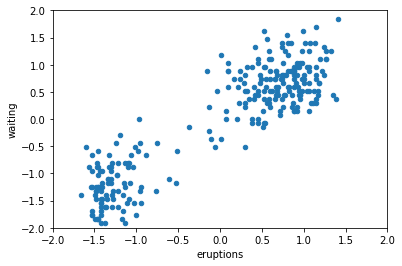

In [7]:
std_df.plot.scatter(x ='eruptions', y= 'waiting' )
plt.xlim([-2, 2])
plt.ylim([-2, 2])
# ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')

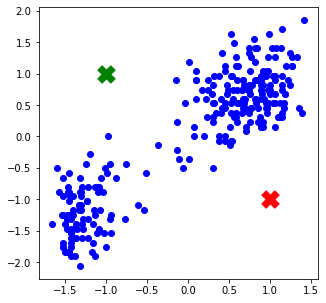

In [8]:
num = 1
J = {}
count = 0
k = 2
centroids = {1:[1,-1],2:[-1,1]}
fig = plt.figure(figsize=(5, 5))
plt.scatter(std_df["eruptions"],std_df["waiting"],color = 'blue')
colmap = {1:'red',2:'green'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i] , marker = 'X' , s = 300)
fig.savefig('plot_{}.png'.format(num), dpi=fig.dpi)  
num+=1
plt.show()

   eruptions   waiting  distance_from_1  distance_from_2  closest  color
0   0.098499  0.597123         1.833987         1.170047        2  green
1  -1.481459 -1.245181         2.493542         2.296223        2  green
2  -0.135861  0.228663         1.673258         1.158316        2  green
3  -1.057503 -0.655644         2.086121         1.656642        2  green
4   0.917443  1.039277         2.040947         1.917846        2  green


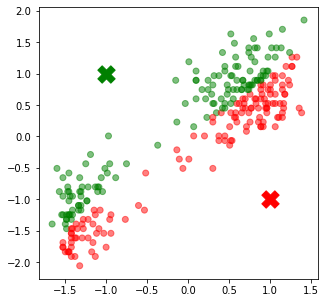

In [9]:
def assignment(std_df, centroids):
    global count
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        std_df['distance_from_{}'.format(i)] = (np.sqrt((std_df['eruptions'] - centroids[i][0]) ** 2
                                                    + (std_df['waiting'] - centroids[i][1]) ** 2))
    
    error = {count:std_df[["distance_from_1","distance_from_2"]].min(axis = 1).sum()}
    J.update(error)
    count+=1
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    std_df['closest'] = std_df.loc[:, centroid_distance_cols].idxmin(axis=1)
    std_df['closest'] = std_df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    std_df['color'] = std_df['closest'].map(lambda x: colmap[x])
    return std_df

std_df = assignment(std_df, centroids)
print(std_df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(std_df['eruptions'], std_df['waiting'], color=std_df['color'], alpha=0.5)
for i in centroids.keys():
     plt.scatter(*centroids[i], color=colmap[i] ,marker='X',s = 300)
plt.show()
fig.savefig('plot{}.png'.format(num), dpi=fig.dpi)  
num+=1

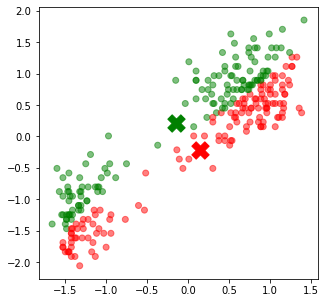

In [10]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(std_df[std_df['closest'] == i]['eruptions'])
        centroids[i][1] = np.mean(std_df[std_df['closest'] == i]['waiting'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(std_df['eruptions'], std_df['waiting'], color=std_df['color'], alpha=0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i] , marker = 'X' , s =300)
fig.savefig('plot{}.png'.format(num), dpi=fig.dpi)  
num+=1
plt.show()

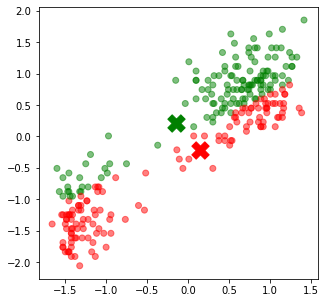

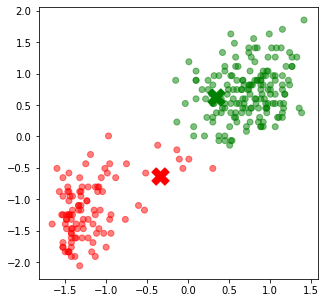

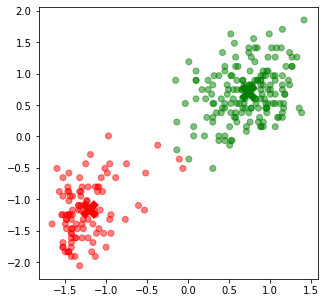

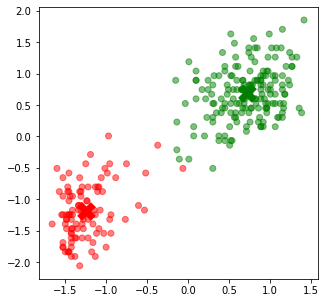

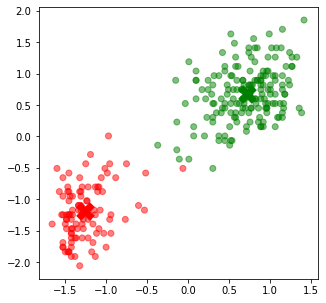

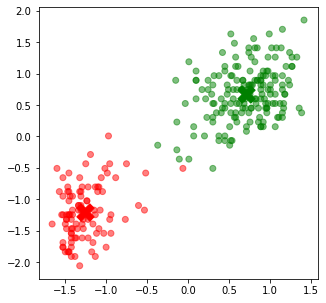

     eruptions   waiting  distance_from_1  distance_from_2  closest  color
0     0.098499  0.597123         2.254116         0.616369        2  green
1    -1.481459 -1.245181         0.225629         2.914617        1    red
2    -0.135861  0.228663         1.819186         0.956952        2  green
3    -1.057503 -0.655644         0.582299         2.213205        1    red
4     0.917443  1.039277         3.124582         0.417834        2  green
..         ...       ...              ...              ...      ...    ...
267   0.552298  0.744508         2.659312         0.171372        2  green
268  -1.174245 -1.834719         0.638944         3.139540        1    red
269   0.815624  1.407737         3.334223         0.738627        2  green
270  -1.466537 -1.834719         0.665960         3.323172        1    red
271   0.859512  0.228663         2.557000         0.472462        2  green

[272 rows x 6 columns]


In [11]:
while True:
    closest_centroids = std_df['closest'].copy(deep=True)
    centroids = update(centroids)
    std_df = assignment(std_df, centroids)
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(std_df['eruptions'], std_df['waiting'], color=std_df['color'], alpha=0.5)
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i] , marker = 'X' , s = 300)
    plt.show()
    fig.savefig('plot{}.png'.format(num), dpi=fig.dpi)  
    num+=1
    if closest_centroids.equals(std_df['closest']):
        break

print(std_df)

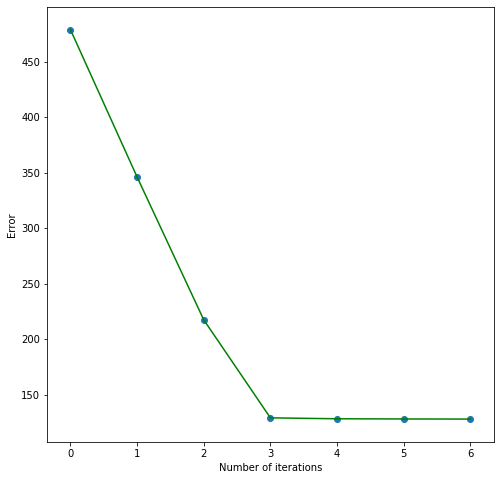

<Figure size 432x288 with 0 Axes>

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(list(J.keys()),list(J.values()), color ='green')
plt.scatter(list(J.keys()),list(J.values()))
plt.ylabel("Error")
plt.xlabel("Number of iterations") 
num+=1
plt.show()
plt.savefig('ErrorvsIteration.jpeg', dpi=800)